## 協調型推薦
### ユーザベースの最近傍推薦

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

<pre>
擬似データセットを作成
各ユーザはアイテムごとの評価値があるとする。
user1 = np.array([アイテム1, アイテム2, アイテム3, アイテム4, アイテム5])
アリスはアイテム5を何点のスコアでつけるのかユーザベースで考えてみる
</pre>

In [2]:
# データセット
aris =  np.array([5,3,4,4]) # アリスだけアイテム５を買っておらず、そこを予測
user1 = np.array([3,1,2,3,3])
user2 = np.array([4,3,4,3,5])
user3 = np.array([3,3,1,5,4])
user4 = np.array([1,5,5,2,1])

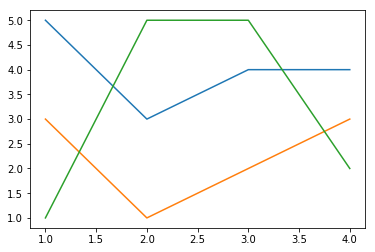

In [3]:
plt.plot([1,2,3,4], aris)
plt.plot([1,2,3,4], user1[:4])
plt.plot([1,2,3,4], user4[:4])
plt.show()

<pre>
ピアソンの相関係数でユーザ間の類似度を測る
</pre>

In [6]:
(sim1, _p) = pearsonr(aris, user1[:4])
(sim2, _p) = pearsonr(aris, user2[:4])
(sim3, _p) = pearsonr(aris, user3[:4])
(sim4, _p) = pearsonr(aris, user4[:4])
print("user1=",sim1)
print("user2=",sim2)
print("user3=",sim3)
print("user4=",sim4)

user1= 0.852802865422
user2= 0.707106781187
user3= 0.0
user4= -0.792118034381


<pre>
ピアソンの相関係数を求めたことにより、類似しているユーザがユーザ１とユーザ２とわかった。
ユーザaにおけるアイテムpの評価値を予測できる式は以下のような最近傍ユーザNの相対的な近接性とaの平均評価値によって計算する。
</pre>

\begin{equation*}
pred(a, p) = \overline{r_a} + \frac{ \Sigma_{b\in N} sim(a,b) \times  (r_{b,p} - \overline{r_b})}{ \Sigma_{b\in N} sim(a, b)}
\end{equation*}

In [18]:

pred = np.average(aris) + (sim1 * (user1[4] - np.average(user1)) + sim2 * (user2[4] - np.average(user2) ) )/(sim1 + sim2)
print("アリスのアイテム５評価値はおよそ",pred,"点")

アリスのアイテム５評価値はおよそ 4.87197989937 点
